<a href="https://colab.research.google.com/github/milxss/Medium/blob/main/TS_sales_medium.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import pandas as pd
import numpy as np

# Create a mock sales dataset
dates = pd.date_range(start='2019-01-01', end='2023-12-31', freq='M')
sales_data = pd.DataFrame({'Date': dates, 'Sales': np.random.normal(100, 50, len(dates))})
sales_data.set_index('Date', inplace=True)

# Save the dataset to a CSV file
sales_data.to_csv('sales.csv')


In [48]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm

# Load the data
sales_data = pd.read_csv('/content/sales.csv', parse_dates=['Date'], index_col='Date')


In [49]:
sales_data.head()

,Sales
Date,
2019-01-31,65.821295
2019-02-28,107.117144
2019-03-31,23.936799
2019-04-30,144.210101
2019-05-31,158.346498


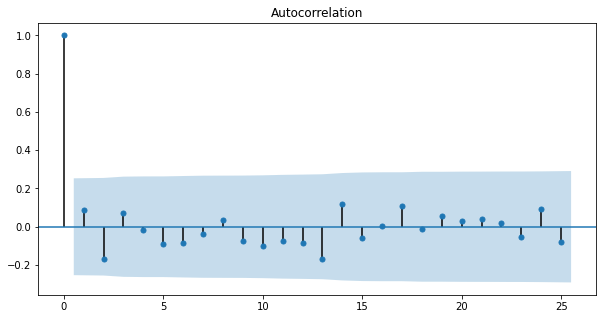

In [80]:
# Plot the ACF
fig, ax = plt.subplots(figsize=(10, 5))
sm.graphics.tsa.plot_acf(sales_data, lags=25, ax=ax)
plt.show()

In ACF there are possibly no statistically significant correlations, it will determine the 'p' parameter in ARIMA.

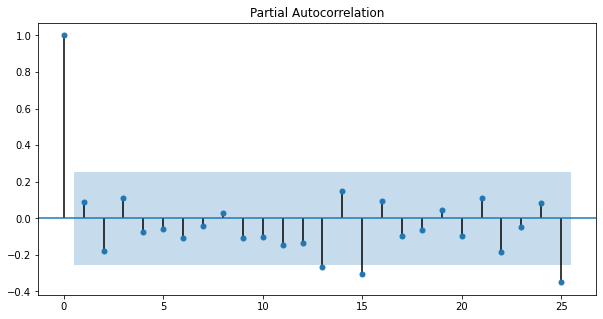

In [79]:
# Plot the PACF
fig, ax = plt.subplots(figsize=(10, 5))
sm.graphics.tsa.plot_pacf(sales_data, lags=25, ax=ax)
plt.show()

in the PACF plot we see 3 possibly statistically significant autocorrelations. It will determine 'q' parameter in ARIMA.

In [86]:
# Create the model
model = ARIMA(sales_data, order=(0,0,3))
# The data has no trend, hence param 'd' is 0

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


In [87]:
# Fit the model
model_fit = model.fit()

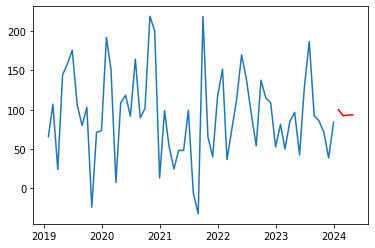

In [88]:
# Make a forecast for the next 4 months
forecast = model_fit.forecast(steps=4)

# Plot the results
plt.plot(sales_data)
plt.plot(forecast, color='red')
plt.show()

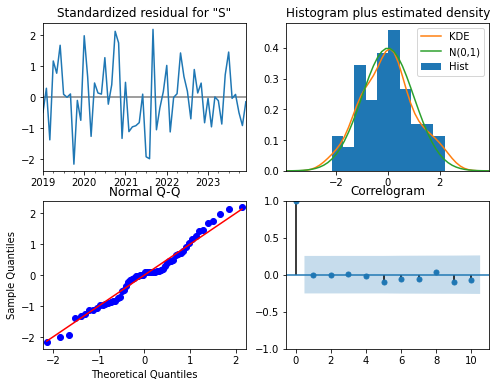

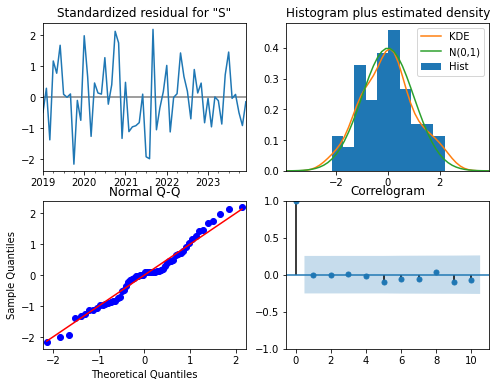

In [89]:
model_fit.plot_diagnostics(figsize=(8, 6))